In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
"""DATA"""

"""Temperature"""

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Daily'

Tas_WA = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')
Tas_min_WA = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')
Tas_max_WA = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')

Tas_EB = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_min_EB = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')
Tas_max_EB = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat-16.0to-12.0lon-46.0to-42.0.nc4' , engine = 'netcdf4')

Tas_CU = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')
Tas_min_CU = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')
Tas_max_CU = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')

Tav_EB = Tas_EB.tas[: ,  : , :]
Tmax_EB = Tas_max_EB.tasmax[: , : , :]
Tmin_EB = Tas_min_EB.tasmin[: , : , :]

Tav_WA = Tas_WA.tas[: ,  : , :]
Tmax_WA = Tas_max_WA.tasmax[: , : , :]
Tmin_WA = Tas_min_WA.tasmin[: , : , :]

Tav_CU = Tas_CU.tas[: ,  : , :]
Tmax_CU = Tas_max_CU.tasmax[: , : , :]
Tmin_CU = Tas_min_CU.tasmin[: , : , :]

"""Models"""

"""WA"""

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/West_Africa/'
home_b = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_WA.nc' , engine = 'netcdf4')
FBP_monthly_WA = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_WA.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_WA.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_WA.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_WA.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_WA = DOLCE_v3_monthly * factor
UKESM1_0_LL_WA = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_WA = EC_Earth3_veg.evspsbl * t_day
CESM2_WA = CESM2.evspsbl * t_day
CMCC_ESM2_WA = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_WA = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_WA = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_WA = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_WA = MIROC6.evspsbl * t_day

t = 120

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

dpm = np.array(dpm)
ET_mean_DOLCE_v3_WA = DOLCE_v3_monthly_WA.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_WA = FBP_monthly_WA.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_WA = UKESM1_0_LL_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_WA = EC_Earth3_veg_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_WA = CESM2_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_WA = CMCC_ESM2_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_WA = E3SM_1_1_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_WA = HadGEM3_GC31_LL_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_WA = IPSL_CM6A_LR_WA.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_WA = MIROC6_WA.mean(axis=(1, 2))[0:120] * dpm

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_WA.nc' , engine = 'netcdf4')

P_mean_WA = np.zeros(t)

for i in range(len(P_mean_WA)):
    P_mean_WA[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]

"""EB"""

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/East_Brazil/'
home_b = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products/'

LFE_monthly = xr.open_dataset(home_b + 'LandFlux-EVAL/Monthly/LandFluxEVAL.merged.89-05.monthly.all.nc' , engine = 'netcdf4')
SA = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012.nc' , engine = 'netcdf4')
DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_EB.nc' , engine = 'netcdf4')
FBP_monthly_EB = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_EB.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_EB.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_EB.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_EB.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_EB.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_EB = DOLCE_v3_monthly * factor
UKESM1_0_LL_EB = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_EB = EC_Earth3_veg.evspsbl * t_day
CESM2_EB = CESM2.evspsbl * t_day
CMCC_ESM2_EB = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_EB = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_EB = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_EB = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_EB = MIROC6.evspsbl * t_day

ET_mean_DOLCE_v3_EB = DOLCE_v3_monthly_EB.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_EB = FBP_monthly_EB.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_EB = UKESM1_0_LL_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_EB = EC_Earth3_veg_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_EB = CESM2_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_EB = CMCC_ESM2_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_EB = E3SM_1_1_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_EB = HadGEM3_GC31_LL_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_EB = IPSL_CM6A_LR_EB.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_EB = MIROC6_EB.mean(axis=(1, 2))[0:120] * dpm

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly.nc' , engine = 'netcdf4')

P_mean_EB = np.zeros(t)

for i in range(len(P_mean_EB)):
    P_mean_EB[i] = Prec_monthly_2001_2010.pr[i , 204:212 , 134*2:138*2].mean() * t_day * dpm[i]
    

"""CU"""

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/Central_US/'
home_b = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products/'

DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_CU.nc' , engine = 'netcdf4')
FBP_monthly_CU = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_CU.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_CU.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_CU.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_CU.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly_CU = DOLCE_v3_monthly * factor
UKESM1_0_LL_CU = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg_CU = EC_Earth3_veg.evspsbl * t_day
CESM2_CU = CESM2.evspsbl * t_day
CMCC_ESM2_CU = CMCC_ESM2.evspsbl * t_day
E3SM_1_1_CU = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL_CU = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR_CU = IPSL_CM6A_LR.evspsbl * t_day
MIROC6_CU = MIROC6.evspsbl * t_day

dpm = np.array(dpm)
ET_mean_DOLCE_v3_CU= DOLCE_v3_monthly_CU.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP_CU = FBP_monthly_CU.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL_CU = UKESM1_0_LL_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg_CU = EC_Earth3_veg_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2_CU = CESM2_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2_CU = CMCC_ESM2_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1_CU = E3SM_1_1_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL_CU = HadGEM3_GC31_LL_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR_CU = IPSL_CM6A_LR_CU.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6_CU = MIROC6_CU.mean(axis=(1, 2))[0:120] * dpm

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_CU.nc' , engine = 'netcdf4')

P_mean_CU = np.zeros(t)

for i in range(len(P_mean_CU)):
    P_mean_CU[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]

In [4]:
"""Function for EP"""

def EP_HS(J, lat ,Tmax,Tmin,Tav):
    # extraterrestrial radation
    G = 0.0820  #MJ m^-2 min^-1
    phi = lat/360 * (2*np.pi) #rad
    d = 1 + 0.033 * np.cos(0.0172 * J) #[-]
    delta = 0.409 * np.sin(0.0172 * J - 1.39) #rad
    w = np.arccos(-np.tan(phi)*np.tan(delta)) #rad
    Re = (24*60)/np.pi * G * d * (w*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(w)) #MJ m^-2 d^-1
    
    # Hargreaves and Samani EP
    labda = 2.45 # MJ kg^-1
    alpha = 0.0023
    Ep = (1/labda) * alpha * Re * (Tav + 17.8) * np.sqrt(Tmax-Tmin) #convert to mm
    if(Ep<0):
        Ep=0
    return(Ep)

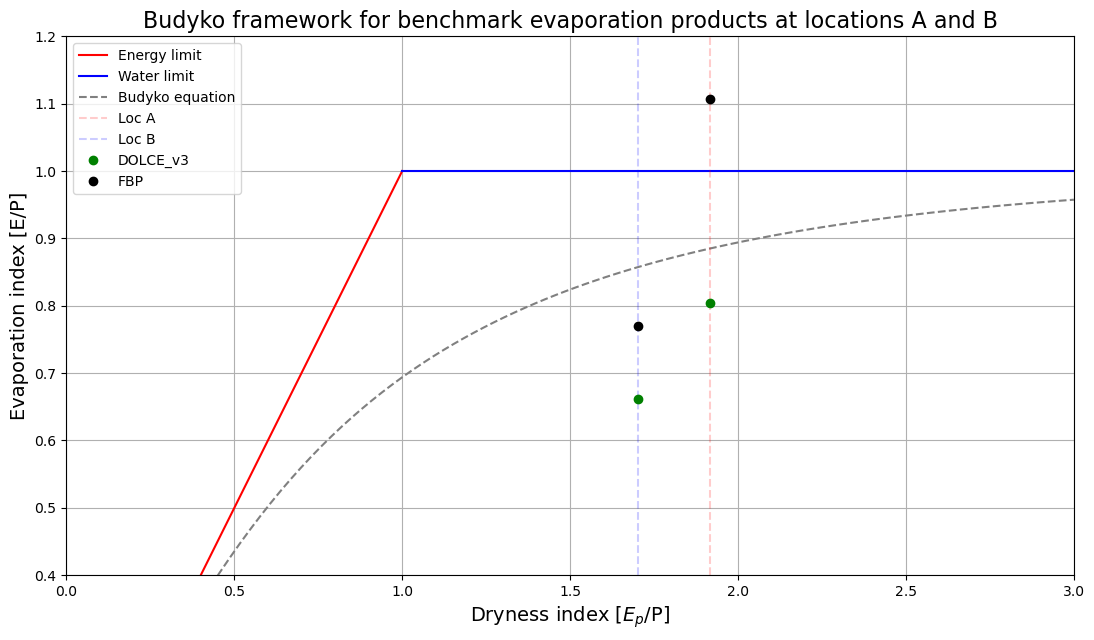

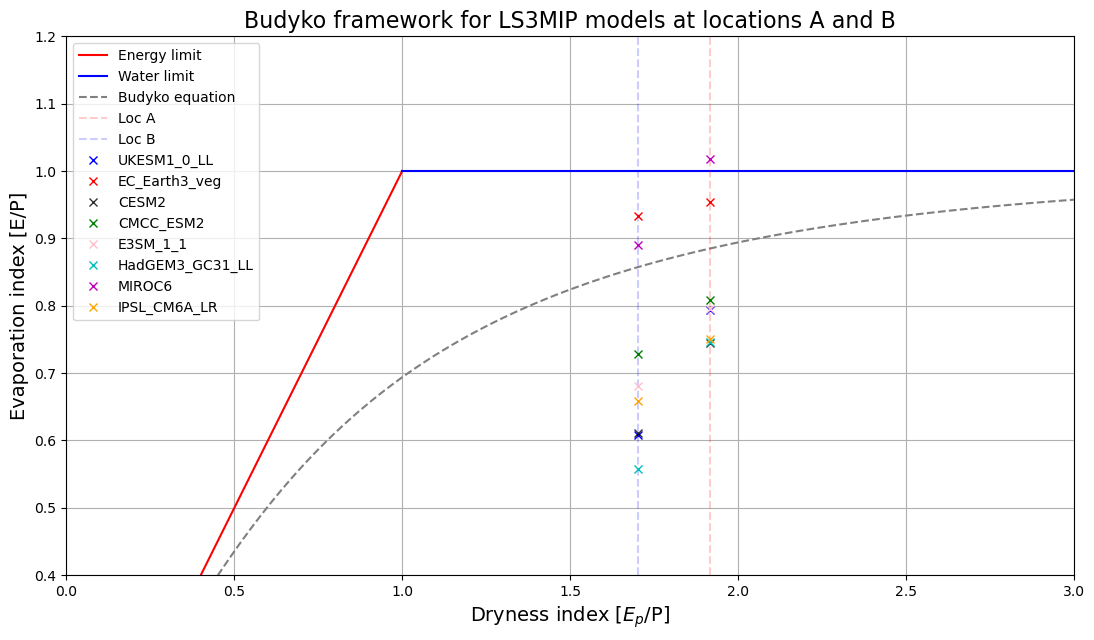

In [15]:
"""EP_0"""

EP_0_EB = np.zeros(365)
EP_0_WA = np.zeros(365)

for i in range(365):
    EP_0_EB[i] = EP_HS(i+1 , -14 , Tmax_EB[i , : , :].mean()-273.15 , Tmin_EB[i , : , :].mean()-273.15 , Tav_EB[i , : , :].mean()-273.15) * (365.2 / 12)
    EP_0_WA[i] = EP_HS(i+1 , 10 , Tmax_WA[i , : , :].mean()-273.15 , Tmin_WA[i , : , :].mean()-273.15 , Tav_WA[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (13 , 7))
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')
plt.grid()


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.2 , linestyle = 'dashed')
plt.grid()

"""Models"""

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_DOLCE_v3_EB.mean()/ P_mean_EB.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_FBP_EB.mean()/ P_mean_EB.mean() , 'ko' , label = 'FBP')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean() , 'go')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_FBP_WA.mean()/ P_mean_WA.mean() , 'ko')



plt.xlabel(r'Dryness index [$E_p$/P]' , fontsize = 14)
plt.ylabel('Evaporation index [E/P]' , fontsize = 14)
plt.title('Budyko framework for benchmark evaporation products at locations A and B' , fontsize = 16)
plt.grid()
plt.legend()
plt.xlim(0 , 3)
plt.ylim(0.4 , 1.2)

plt.figure(figsize = (13 , 7))
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_EB.mean()/P_mean_EB.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc A' , alpha = 0.2 , linestyle = 'dashed')
plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.2 , linestyle = 'dashed')

plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_UKESM1_0_LL_EB.mean()/ P_mean_EB.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_EC_Earth3_veg_EB.mean()/ P_mean_EB.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CESM2_EB.mean()/ P_mean_EB.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_CMCC_ESM2_EB.mean()/ P_mean_EB.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_E3SM_1_1_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_HadGEM3_GC31_LL_EB.mean()/ P_mean_EB.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_MIROC6_EB.mean()/ P_mean_EB.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_EB.mean()/P_mean_EB.mean() , ET_mean_IPSL_CM6A_LR_EB.mean()/ P_mean_EB.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_UKESM1_0_LL_WA.mean()/ P_mean_WA.mean() , 'bx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() , 'rx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CESM2_WA.mean()/ P_mean_WA.mean() , 'kx' , alpha = 0.8)
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CMCC_ESM2_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_E3SM_1_1_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_MIROC6_WA.mean()/ P_mean_WA.mean() , 'mx')
plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_IPSL_CM6A_LR_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel(r'Dryness index [$E_p$/P]' , fontsize = 14)
plt.ylabel(r'Evaporation index [E/P]' , fontsize = 14)
plt.title('Budyko framework for LS3MIP models at locations A and B' , fontsize = 16)
plt.grid()
plt.ylim(0.4  , 1.2)
plt.xlim(0 , 3)
plt.legend();

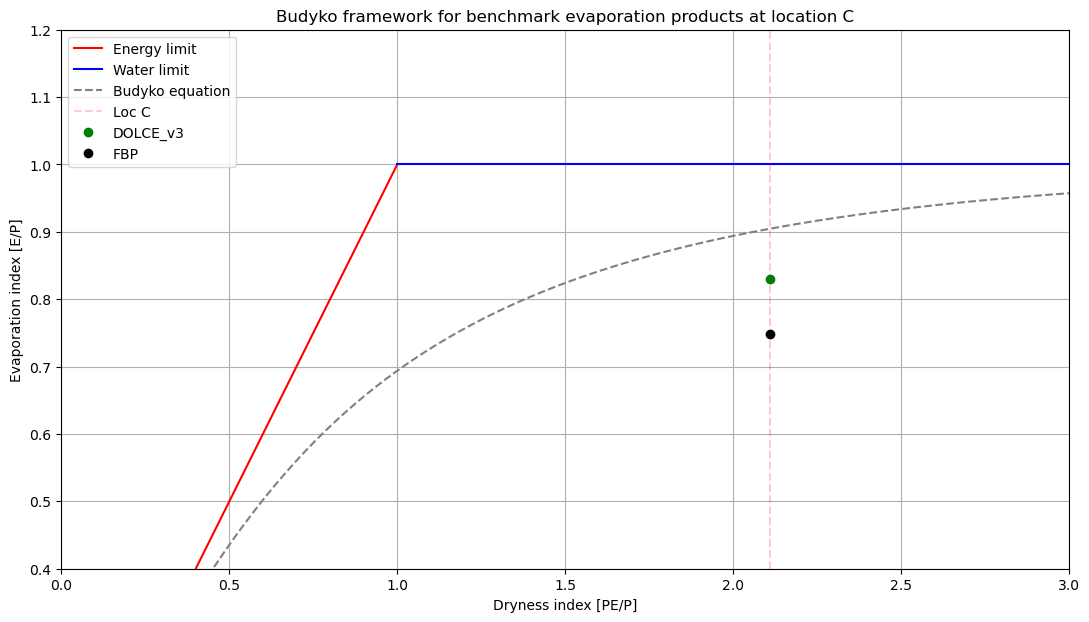

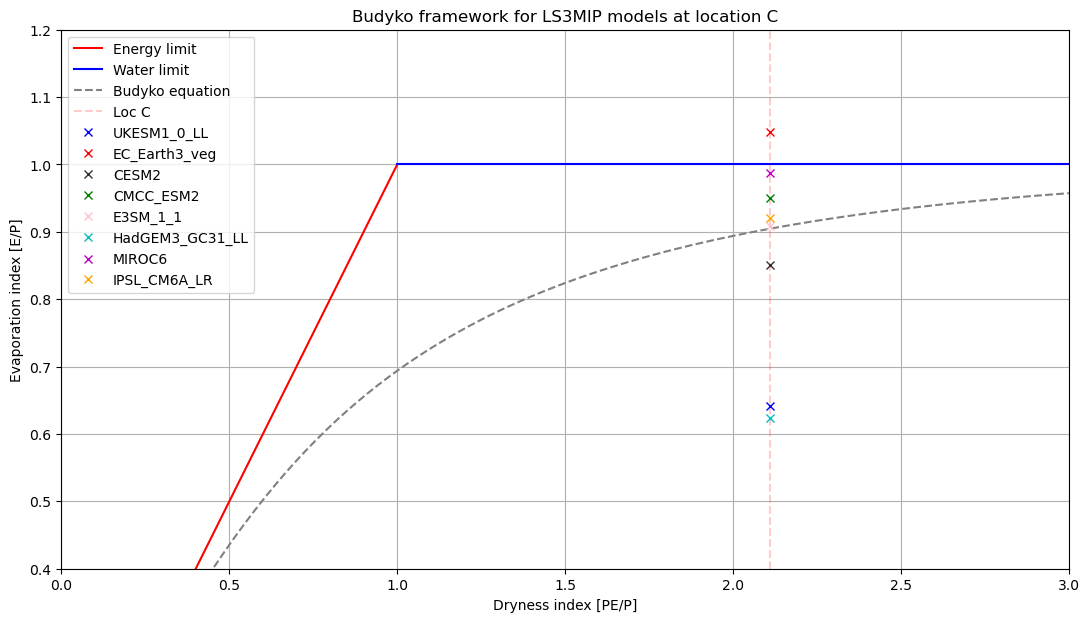

In [16]:
"""EP_0"""

EP_0_CU = np.zeros(365)
#EP_0_WA = np.zeros(365)

for i in range(365):
    EP_0_CU[i] = EP_HS(i+1 , -14 , Tmax_CU[i , : , :].mean()-273.15 , Tmin_CU[i , : , :].mean()-273.15 , Tav_CU[i , : , :].mean()-273.15) * (365.2 / 12)
    #EP_0_WA[i] = EP_HS(i+1 , 10 , Tmax_WA[i , : , :].mean()-273.15 , Tmin_WA[i , : , :].mean()-273.15 , Tav_WA[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (13 , 7))
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')
plt.grid()


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc C' , alpha = 0.2 , linestyle = 'dashed')
#plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.2 , linestyle = 'dashed')
plt.grid()

"""Models"""

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_DOLCE_v3_CU.mean()/ P_mean_CU.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_FBP_CU.mean()/ P_mean_CU.mean() , 'ko' , label = 'FBP')

#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_DOLCE_v3_WA.mean()/ P_mean_WA.mean() , 'go')
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_FBP_WA.mean()/ P_mean_WA.mean() , 'ko')



plt.xlabel('Dryness index [PE/P]')
plt.ylabel('Evaporation index [E/P]')
plt.title('Budyko framework for benchmark evaporation products at location C')
plt.grid()
plt.xlim(0 , 3)
plt.legend()
plt.ylim(0.4 , 1.2)

plt.figure(figsize = (13 , 7))
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')
plt.axvline(x = EP_0_CU.mean()/P_mean_CU.mean() , ymin = 0 , ymax = 1 , color = 'red' , label = 'Loc C' , alpha = 0.2 , linestyle = 'dashed')
#plt.axvline(x = EP_0_WA.mean()/P_mean_WA.mean() , ymin = 0 , ymax = 1 , color = 'blue' , label = 'Loc B' , alpha = 0.2 , linestyle = 'dashed')

plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_UKESM1_0_LL_CU.mean()/ P_mean_CU.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_EC_Earth3_veg_CU.mean()/ P_mean_CU.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CESM2_CU.mean()/ P_mean_CU.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_CMCC_ESM2_CU.mean()/ P_mean_CU.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_E3SM_1_1_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_HadGEM3_GC31_LL_CU.mean()/ P_mean_CU.mean() , 'cx' , linestyle = (0 , (0 , 100))  , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_MIROC6_CU.mean()/ P_mean_CU.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0_CU.mean()/P_mean_CU.mean() , ET_mean_IPSL_CM6A_LR_CU.mean()/ P_mean_CU.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_UKESM1_0_LL_WA.mean()/ P_mean_WA.mean() , 'bx')
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_EC_Earth3_veg_WA.mean()/ P_mean_WA.mean() , 'rx')
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CESM2_WA.mean()/ P_mean_WA.mean() , 'kx' , alpha = 0.8)
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_CMCC_ESM2_WA.mean()/ P_mean_WA.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green')
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_E3SM_1_1_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x')
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_HadGEM3_GC31_LL_WA.mean()/ P_mean_WA.mean(), 'cx' , linestyle = (0 , (0 , 100)))
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_MIROC6_WA.mean()/ P_mean_WA.mean() , 'mx')
#plt.plot(EP_0_WA.mean()/P_mean_WA.mean() , ET_mean_IPSL_CM6A_LR_WA.mean()/ P_mean_WA.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x')


plt.xlabel('Dryness index [PE/P]')
plt.ylabel('Evaporation index [E/P]')
plt.title('Budyko framework for LS3MIP models at location C')
plt.grid()
plt.xlim(0 , 3)
plt.ylim(0.4  , 1.2)
plt.legend();

In [7]:
Tas_CU

<xarray.Dataset>
Dimensions:  (lat: 8, lon: 8, time: 3652)
Coordinates:
  * lat      (lat) float32 41.75 41.25 40.75 40.25 39.75 39.25 38.75 38.25
  * lon      (lon) float32 -101.8 -101.2 -100.8 -100.2 ... -99.25 -98.75 -98.25
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    title:        EWEMBI global meteorological forcing data processed for ISI...
    Conventions:  CF-1.6
    version:      This version of the GSWP3-EWEMBI dataset was published on 0...

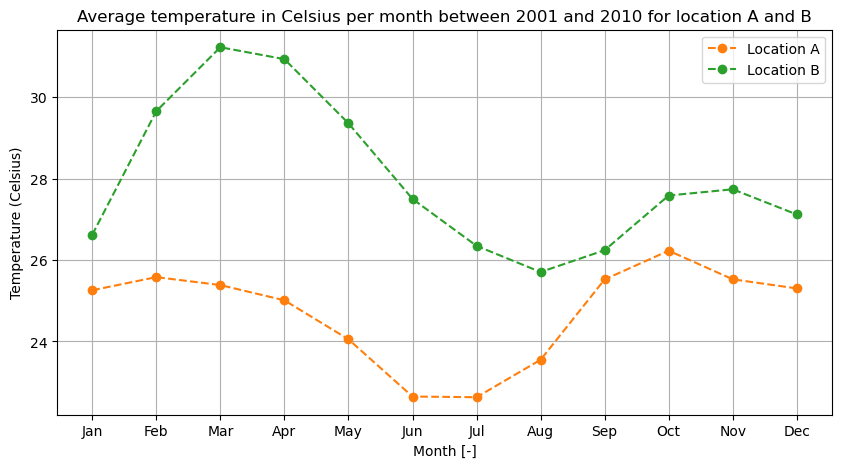

In [8]:
import datetime
from collections import defaultdict

#EB

# your array of data
t = 3652
Tas_mean_EB = np.zeros(t)

for i in range(t):
    Tas_mean_EB[i] = Tas_EB.tas[i , : , :].mean()
    
data = Tas_mean_EB
avg_EB = np.zeros(12)
    

# Create an empty dictionary to store the monthly averages
monthly_averages = defaultdict(list)

# loop through the data and group the values by month
for i, value in enumerate(data):
    date = datetime.datetime(2001, 1, 1) + datetime.timedelta(i)
    if date.year >= 2001 and date.year <= 2010:
        month = date.month
        monthly_averages[month].append(value)

# calculate the mean for each month
for month, values in monthly_averages.items():
    avg_EB[month - 1] = sum(values) / len(values)
    
Tas_mean_EB = np.zeros(t)

for i in range(t):
    Tas_mean_EB[i] = Tas_EB.tas[i , : , :].mean()
    
#WA

Tas_mean_WA = np.zeros(t)

for i in range(t):
    Tas_mean_WA[i] = Tas_WA.tas[i , : , :].mean()
    
data = Tas_mean_WA
avg_WA = np.zeros(12)
    

# Create an empty dictionary to store the monthly averages
monthly_averages = defaultdict(list)

# loop through the data and group the values by month
for i, value in enumerate(data):
    date = datetime.datetime(2001, 1, 1) + datetime.timedelta(i)
    if date.year >= 2001 and date.year <= 2010:
        month = date.month
        monthly_averages[month].append(value)

# calculate the mean for each month
for month, values in monthly_averages.items():
    avg_WA[month - 1] = sum(values) / len(values)
    
plt.figure(figsize = (10 , 5 ))
#plt.plot(P_mean/ET_mean_LFE , label = 'P/ET per month LFE')
plt.plot(avg_EB - 273.15 , label = 'Location A' , color = 'C1' , marker = 'o' , linestyle = 'dashed')
plt.plot(avg_WA - 273.15 , label = 'Location B' , color = 'C2' , marker = 'o' , linestyle = 'dashed')

plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Month [-]')
plt.title('Average temperature in Celsius per month between 2001 and 2010 for location A and B')
plt.legend();